The main relationship regarding the FFT is:
\begin{equation}
\Delta f = \frac{1}{N \Delta t} = \frac{F_s}{N}
\end{equation}

Therefore increasing the sampling rate reduces the frequency resolution (produces a larger $\Delta f$). This can be compensanted only by taking more data points (increasing $N$).

The FFT produces a vector of complex outputs for frequencies in the range: $f = [ -F_s/2, F_s/2 ]$. When the time domain signal is real, them the output is hermitian symmetric, so the spectrum at the frequency $-f$ is just the complex conjugate of the
spectrum at frequency $f$. In this case we can safely discard the negative frequencies, so the output of the FFT will have frequencies in the range $f = [0, F_s/2]$, with a total number of points $N_f = N/2+1$.

Below is an example in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

First create the time base with a sampling frequency of $F_s$

Text(0,0.5,'Signal')

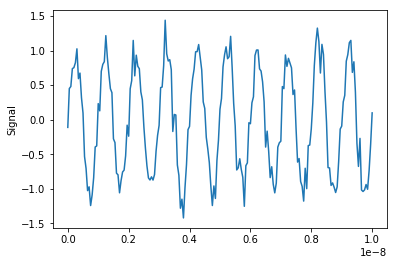

In [2]:
Fs = 20e9 #10 GSps
tmax = 10e-9
t = np.arange(0,tmax+0.1/Fs,1/Fs)

#Signal
f1 = 1e9
x1 = np.sin(2*pi*f1*t)

#Noise
sigma = 0.2
n = np.random.normal(0, sigma, t.size)
x1 = x1+n

#plot
plt.plot(t,x1)
plt.ylabel('Signal')

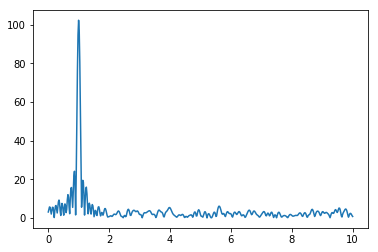

In [3]:
NFFT = 1024
Nfreqs = int(NFFT/2+1)
freq_axis = np.linspace(0.0,Fs/2,Nfreqs)*1e-9

X1 = np.fft.rfft(x1,NFFT)
plt.plot(freq_axis, np.abs(X1))

Let's try with my custom python module that already outputs the Fourier frequencies, and can split the signal to inprove the frequency resolution.

In [11]:
from Luis_Functions import FourierThis

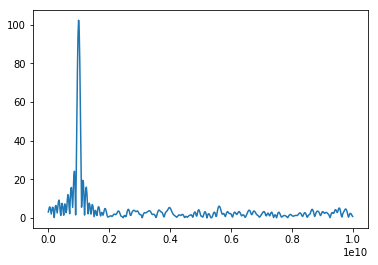

In [13]:
X1, freqs = FourierThis(x1,1/Fs,NFFT)
plt.plot(freqs, np.abs(X1))

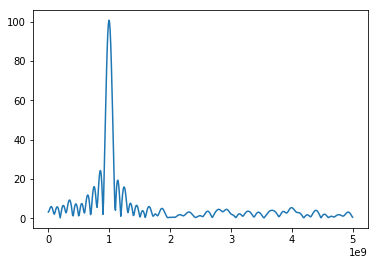

In [14]:
X1, freqs = FourierThis(x1,1/Fs,NFFT,N=2)
plt.plot(freqs, np.abs(X1))

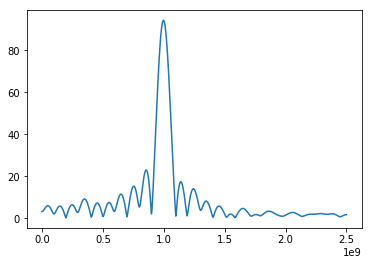

In [15]:
X1, freqs = FourierThis(x1,1/Fs,NFFT,N=4)
plt.plot(freqs, np.abs(X1))

Parseval's Theorem

In [ ]:
#Gaussian pulse parameters
bw = 50e12; #Aprox
tau = 1/bw;
A = 1e4
def pulse(t,w,tau): 
    t0 = 2*tau;
    return A*np.sin(w*t)*np.exp(-((t-t0)/tau)**2)

In [ ]:

t = np.arange(0,STEPS*dt,dt)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t*1e12,pulse(t,w,tau))

#Total energy:
print(np.sum(pulse(t,w,tau)**2)*dt)

xt = x
Xf = X1

energy_t = np.sum(xt**2)*dt
N = len(xt)
Xf= np.abs(Xf)*dt
energy_f = (Xf[0]**2 + 2*np.sum(Xf[1:]**2))/(N*dt)

print("N = ", N)
print("E_t = ", energy_t)
print("E_f = ", energy_f)